# Kaggle - Bag of word meets bag of popcorn

# Part 3 


**last part**
지난 파트에서는 word2vec을 이용해 단어들을 학습한 뒤 t-SNE를 통해 시각화 하고  
단어 벡터의 평균을 구해 랜덤포레스트로 학습시킨 뒤 Predict해보았다.  
하지만 예측률이 Word2vec을 사용하지 않았을 때와 크게 차이가 없었다.(82.836%)  

이번시간에는 word2vec으로 학습한 단어vector들을 K-Means Clustering을 사용해본다. 

In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from bs4 import BeautifulSoup
import re
import time

from nltk.corpus import stopwords
import nltk.data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\gensim-3.4.0-py3.6-win-amd64.egg\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
model = Word2Vec.load('300features_40minwords_10text')
model

In [42]:
# model은 여러 format으로 사용할수 있다.
# .wv.syn0 는 넘파이 배열
# .wv.vocab 은 딕셔너리
# .wv.index2word list
# 여기서는 syn0타입을 사용한다.
# syn0의 경우 (단어 수Xfeature값들=300)으로 구성
print(type(model.wv.syn0))
print(type(model.wv.vocab))
print(type(model.wv.index2word))
print(type(model.wv))

<class 'numpy.ndarray'>
<class 'NoneType'>
<class 'dict'>
<class 'list'>
<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  import sys


In [5]:
model.wv.syn0.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(11986, 300)

In [52]:
# 개별 단어 벡터 접근
model.wv['with'].shape

(300,)

In [68]:
model.wv.index2word

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i',
 'this',
 'that',
 's',
 'movi',
 'film',
 'was',
 'as',
 'with',
 'for',
 'but',
 'you',
 't',
 'be',
 'on',
 'have',
 'not',
 'he',
 'are',
 'his',
 'one',
 'all',
 'at',
 'they',
 'like',
 'by',
 'who',
 'an',
 'from',
 'so',
 'there',
 'her',
 'or',
 'just',
 'about',
 'out',
 'has',
 'if',
 'what',
 'time',
 'some',
 'make',
 'good',
 'can',
 'charact',
 'more',
 'when',
 'see',
 'get',
 'veri',
 'she',
 'up',
 'watch',
 'stori',
 'no',
 'even',
 'would',
 'my',
 'which',
 'their',
 'onli',
 'realli',
 'had',
 'well',
 'scene',
 'do',
 'other',
 'were',
 'we',
 'me',
 'bad',
 'look',
 'than',
 'most',
 'much',
 'end',
 'show',
 'will',
 'great',
 'go',
 'peopl',
 'been',
 'also',
 'into',
 'first',
 'love',
 'becaus',
 'him',
 'how',
 'way',
 'don',
 'play',
 'think',
 'act',
 'thing',
 'them',
 'made',
 'then',
 'could',
 'too',
 'after',
 'seem',
 'ani',
 'know',
 'say',
 'plot',
 'work',
 'two',
 'actor',
 'year',
 

In [53]:
model.wv['with'][:10]

array([-0.04888876,  0.02344336, -0.11825124, -0.0108145 , -0.02040573,
        0.09992806, -0.01389777, -0.02648932, -0.07141103, -0.03799058],
      dtype=float32)

In [14]:
# 단어 벡터에서 k-means를 실행하고 일부 클러스터를 찍어본다.
start = time.time() # 시작시간

# 클러스터의 크기 "k"를 어휘 크기의 1/5 이나 평균 5단어로 설정한다.
word_vectors = model.wv.syn0 # 어휘의 feature vector
num_clusters = word_vectors.shape[0] / 5
num_clusters = int(num_clusters)

# K means 를 정의하고 학습시킨다.
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# 끝난시간에서 시작시간을 빼서 걸린 시간을 구한다.
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """


Time taken for K Means clustering:  427.7881052494049 seconds.


In [20]:
# total time (minute)
print("Time taken for K Means clustering : ", int(elapsed%60), "minutes.")

Time taken for K Means clustering :  7 minutes.


In [54]:
# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = model.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}
#     word_centroid_map = dict(zip( model.wv.index2word, idx ))

# 첫번째 클러스터의 처음 10개를 출력
for cluster in range(0,10):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['appli', 'adher']

Cluster 1
['spread', 'drill', 'signal', 'rig', 'hatch', 'repair', 'leak', 'hid', 'scrambl', 'storag', 'inspect', 'forcibl']

Cluster 2
['taylor', 'miller', 'lane', 'derek', 'sullivan', 'walker', 'ross', 'graham', 'kay', 'reed', 'thompson', 'colin', 'burk', 'hart', 'collin', 'carrol', 'patricia', 'evan', 'farrel', 'tyler', 'gilbert', 'bennett', 'archer', 'keller', 'morton', 'fleme', 'harper', 'palmer', 'lauri', 'joyc', 'baxter', 'henderson', 'byrn', 'courtney', 'theresa', 'mackenzi', 'lesley', 'windsor', 'swain', 'adrienn', 'lucinda', 'cybil', 'rhonda', 'stephenson']

Cluster 3
['full', 'occasion', 'nonstop', 'reflex']

Cluster 4
['cage', 'sidekick', 'baddi', 'foil', 'slimi', 'henchman', 'foley', 'gunsling', 'dastard', 'gunman', 'villian', 'grizzl', 'wili', 'weasel']

Cluster 5
['glorious', 'technicolor', 'cinemascop']

Cluster 6
['tasti', 'dino', 'mangl', 'ouch', 'err', 'knockoff', 'nil', 'icki']

Cluster 7
['danger', 'threat']

Cluster 8
['robocop']

Clu

In [55]:
"""
판다스로 데이터프레임 형태의 데이터로 읽어온다.
QUOTE_MINIMAL (0), QUOTE_ALL (1), 
QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).

그리고 이전 튜토리얼에서 했던 것처럼 clean_train_reviews 와 
clean_test_reviews 로 텍스트를 정제한다.
"""
train = pd.read_csv('data/labeledTrainData.tsv', 
                    header=0, delimiter="\t", quoting=3)
test = pd.read_csv('data/testData.tsv', 
                   header=0, delimiter="\t", quoting=3)
# unlabeled_train = pd.read_csv( 'data/unlabeledTrainData.tsv', header=0,  delimiter="\t", quoting=3 )

In [61]:
from kaggleBagofWord import kaggleBagofWord
# 학습 리뷰를 정제한다.
clean_train_reviews = []
for review in train["review"]:
    clean_train_reviews.append(
        kaggleBagofWord.review_to_wordlist( review, \
        remove_stopwords=True ))

In [62]:
# 테스트 리뷰를 정제한다.
clean_test_reviews = []
for review in test["review"]:
    clean_test_reviews.append(
        kaggleBagofWord.review_to_wordlist( review, \
        remove_stopwords=True ))

In [63]:
# bags of centroids 생성
# 속도를 위해 centroid 학습 세트 bag을 미리 할당 한다.
train_centroids = np.zeros((train["review"].size, num_clusters), \
    dtype="float32" )

train_centroids[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
# centroid 는 두 클러스터의 중심점을 정의 한 다음 중심점의 거리를 측정한 것
def create_bag_of_centroids( wordlist, word_centroid_map ):
    
    # 클러스터의 수는 word / centroid map에서 가장 높은 클러스트 인덱스와 같다.
    num_centroids = max( word_centroid_map.values() ) + 1
    
    # 속도를 위해 bag of centroids vector를 미리 할당한다.
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    
    # 루프를 돌며 단어가 word_centroid_map에 있다면
    # 해당되는 클러스터의 수를 하나씩 증가시켜 준다.
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    
    # bag of centroids를 반환한다.
    return bag_of_centroids

In [65]:
# 학습 리뷰를 bags of centroids 로 변환한다.
counter = 0
for review in clean_train_reviews:
    train_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1

# 테스트 리뷰도 같은 방법으로 반복해 준다.
test_centroids = np.zeros(( test["review"].size, num_clusters), \
    dtype="float32" )

counter = 0
for review in clean_test_reviews:
    test_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1


# 랜덤포레스트를 사용하여 학습시키고 예측
forest = RandomForestClassifier(n_estimators = 100)

# train 데이터의 레이블을 통해 학습시키고 예측한다.
# 시간이 좀 소요되기 때문에 %time을 통해 걸린 시간을 찍도록 함
print("Fitting a random forest to labeled training data...")
%time forest = forest.fit(train_centroids, train["sentiment"])

Fitting a random forest to labeled training data...
Wall time: 38.4 s


In [66]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, train_centroids, train['sentiment'], cv=10,\
    scoring='roc_auc'))

Wall time: 6min 6s


In [67]:
%time result = forest.predict(test_centroids)


Wall time: 2.14 s


In [69]:
score

0.9114175359999999

In [70]:

# 결과를 csv로 저장# 결과를 cs 
output = pd.DataFrame(data={"id":test["id"], "sentiment":result})
output.to_csv("data/submit_BagOfCentroids_{0:.5f}.csv".format(score), index=False, quoting=3)

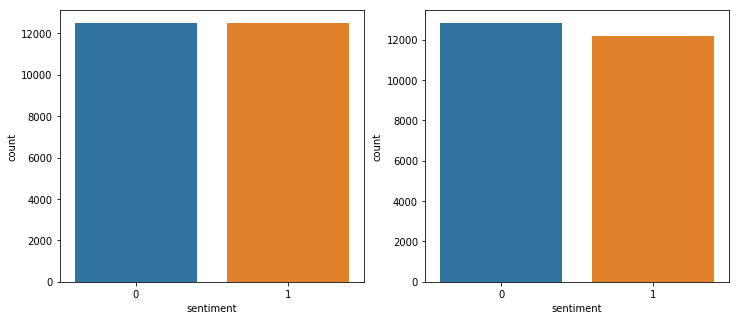

In [72]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])

In [73]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

644


0    12822
1    12178
Name: sentiment, dtype: int64

Kaggle 제출 결과
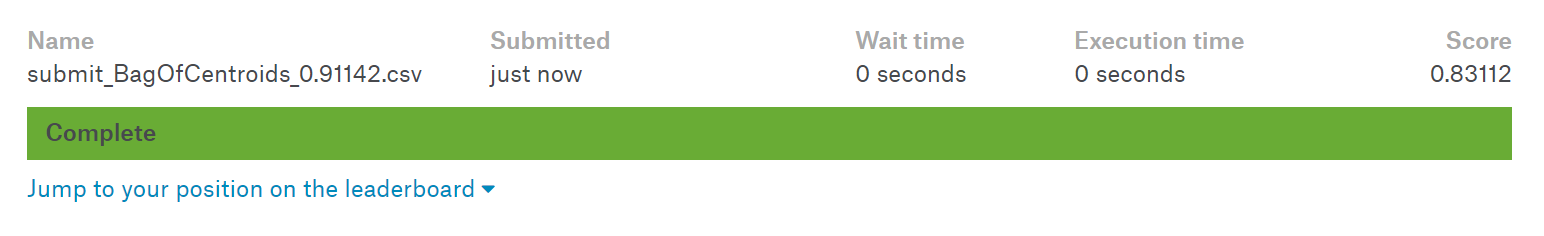

첫번째로 벡터 평균을 했을 때 결과인 81.836%보다는 높아졌지만 여전히 높지 않은 수치이다.
하지만 이 수치 또한 그냥 bag of word를 사용한 것과는 크게 차이나지 않는다.

그 이유에 대해 Kaggle에서 나온 내용을 보자.

First, training Word2Vec on a lot more text should greatly improve performance. Google's results are based on word vectors that were learned out of more than a billion-word corpus; our labeled and unlabeled training sets together are only a measly 18 million words or so. Conveniently, Word2Vec provides functions to load any pre-trained model that is output by Google's original C tool, so it's also possible to train a model in C and then import it into Python.

Second, in published literature, distributed word vector techniques have been shown to outperform Bag of Words models. In this paper, an algorithm called Paragraph Vector is used on the IMDB dataset to produce some of the most state-of-the-art results to date. In part, it does better than the approaches we try here because vector averaging and clustering lose the word order, whereas Paragraph Vectors preserves word order information.